In [2]:
#Modelagem e simulação do mundo físico 2016.1
#Ana Lúcia Capriles Port e Bruno Nazario
#Professora: Paulina Achurra

from numpy import linspace
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from numpy import linalg 
from numpy import multiply 
from numpy import concatenate
import math

In [3]:
def func1(v, t): #v = [x, y, vy]
    m = 88
    g = 9.8
    k = 0.5
    dvdt = (k/m)*(v[1]**2) - g
    dydt = v[1]
    return [dydt, dvdt]

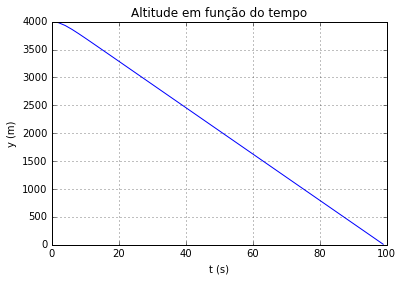

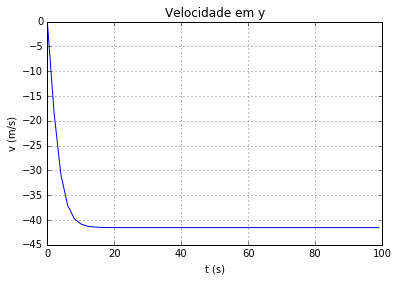

In [6]:
T = linspace(0,99)
v0 = [4000, 0]
y = odeint(func1,v0,T)
plt.plot(T, y[:,0])
plt.title('Altitude em função do tempo')
plt.xlabel('t (s)')
plt.ylabel('y (m)')
plt.grid()
plt.show()

plt.plot(T, y[:,1])
plt.title('Velocidade em y')
plt.xlabel('t (s)')
plt.ylabel('v (m/s)')
plt.grid()
plt.show()

In [8]:
def modelo_adiabatico_temperatura_pressao_atmosfera(Vetor_velocidade):
    dxdt = A[2]
    dydt = A[3]
    dVxdt = F[0] / m
    dVydt = (F[1] - P) / m
    
    V_x = Vetor_velocidade[0]
    V_y = Vetor_velocidade[1]
    V = [V_x, V_y] #vetor velocidade resultante

    v = linalg.norm(V) #magnitude de V
    v_versor = V/v 
    
    F = multiply(-k*(v**2), v_versor)
    
    dpressdt = - (P * 28.96 * 9.8 * dVydt * math.e**((-28.96 * 9.8*dydt)/(dtempdt*0.082)))/ (0.082*dtempdt)
    dtempdt = ((28.96 * 9.8)/1.01) * dVydt
    ddensdt = (dpressdt * 28.96) / (0.082 * dtempdt)
    K = 0.5 * ddensdt * 10 * 1.5
    return K

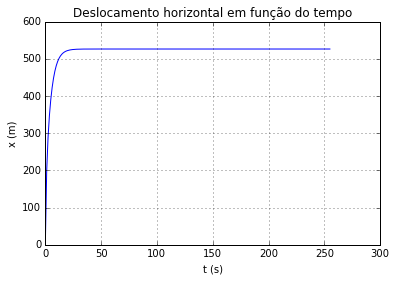

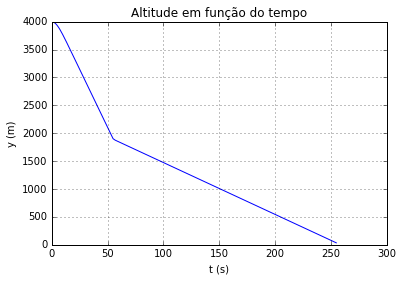

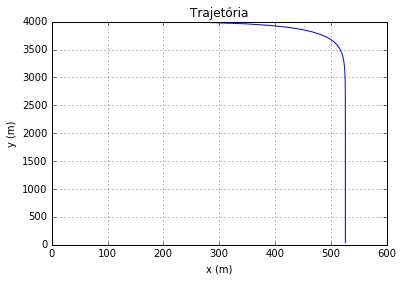

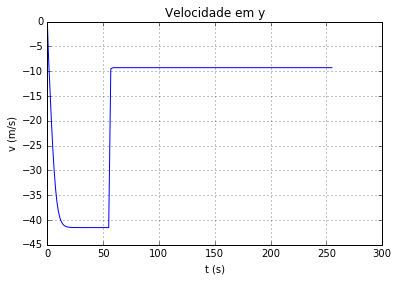

In [10]:
def forca_de_resistencia_do_ar(Vetor_velocidade, k):
    V_x = Vetor_velocidade[0]
    V_y = Vetor_velocidade[1]
    V = [V_x, V_y] #vetor velocidade resultante

    v = linalg.norm(V) #magnitude de V
    v_versor = V/v 
    
    K = modelo_adiabatico_temperatura_pressao_atmosfera(V)
    
    F = multiply(-k*(v**2), v_versor)
    return F

#massa da pessoa em kg (70 kg) mais a massa do paraquedas em kg (18 kg) 
m = 88
#peso da pessoa em N:
P = 88*9.8

def func(A, t): #A = [x, y, Vx, Vy]
    
    F = forca_de_resistencia_do_ar([A[2], A[3]], 0.5)

    dxdt = A[2]
    dydt = A[3]
    dVxdt = F[0] / m
    dVydt = (F[1] - P) / m
    
    return [dxdt, dydt, dVxdt, dVydt]

def func_paraquedas_abre(A, t): #A = [x, y, Vx, Vy]
    
    F = forca_de_resistencia_do_ar([A[2], A[3]], 10)
    
    dxdt = A[2]
    dydt = A[3]
    dVxdt = F[0] / m
    dVydt = (F[1] - P) / m
    
    return [dxdt, dydt, dVxdt, dVydt]

#Condicões iniciais
#A = [x, y, Vx, Vy]
#x0 = 0
#y0 = 4000 #metros -- altitude
#Vx0 = 540 #metros por segundo
#Vy0 = 0

A0 = [0,4000,300,0]
T = linspace(0,55,46)
T2 = linspace(55,255,107)
M = odeint(func, A0, T, mxstep=500000000) 
l1 = M[-1,0]
l2 = M[-1,1]
l3 = M[-1,2]
l4 = M[-1,3]
A1 = [l1, l2, l3, l4]
M2 = odeint(func_paraquedas_abre, A1, T2, mxstep=500000000)
T_final = concatenate((T, T2), axis=0)
M3 = concatenate((M, M2), axis = 0)

plt.plot(T_final, M3[:,0])
plt.xlabel('t (s)')
plt.ylabel('x (m)')
plt.title('Deslocamento horizontal em função do tempo')
plt.grid()
plt.show() 

plt.plot(T_final, M3[:,1])
plt.xlabel('t (s)')
plt.ylabel('y (m)')
plt.title('Altitude em função do tempo')
plt.grid()
plt.show()

plt.plot(M3[:,0], M3[:,1])
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Trajetória')
plt.grid()
plt.show() 

plt.plot(T_final, M3[:,3])
plt.xlabel('t (s)')
plt.ylabel('v (m/s)')
plt.title('Velocidade em y')
plt.grid()
plt.show() 